In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sqlite3
import scipy.stats as stats
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')



In [81]:
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query("""
    SELECT * FROM vendor_sales_summary
    WHERE GrossProfit > 0
    AND ProfitMargin > 0
    AND TotalSalesQuantity > 0
""", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


## Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.  

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.  


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8564.0,10107.074965,17635.714818,2.000000,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8564.0,17614.670131,12946.130933,58.000000,5375.750000,17606.000000,24935.250000,9.063100e+04
PurchasePrice,8564.0,21.780897,81.189624,0.360000,6.660000,10.060000,17.850000,3.352930e+03
Volume,8564.0,864.332263,724.240079,50.000000,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,8564.0,32.297467,112.420744,0.490000,9.990000,14.990000,25.990000,4.559990e+03
TotalPurchaseQuantity,8564.0,3772.008991,12276.960631,1.000000,42.000000,431.000000,2666.750000,3.376600e+05
TotalPurchaseDollars,8564.0,35887.253324,136722.999153,0.710000,546.187500,5018.400000,26610.177500,3.811252e+06
TotalSalesDollars,8564.0,51542.278077,186071.489729,1.980000,1355.580000,8483.780000,40622.112500,5.101920e+06
TotalSalesPrice,8564.0,22759.270732,49305.274018,0.990000,584.790000,4549.755000,22595.252500,6.728193e+05
TotalSalesQuantity,8564.0,3748.983419,12125.696083,1.000000,62.000000,490.500000,2675.000000,3.349390e+05


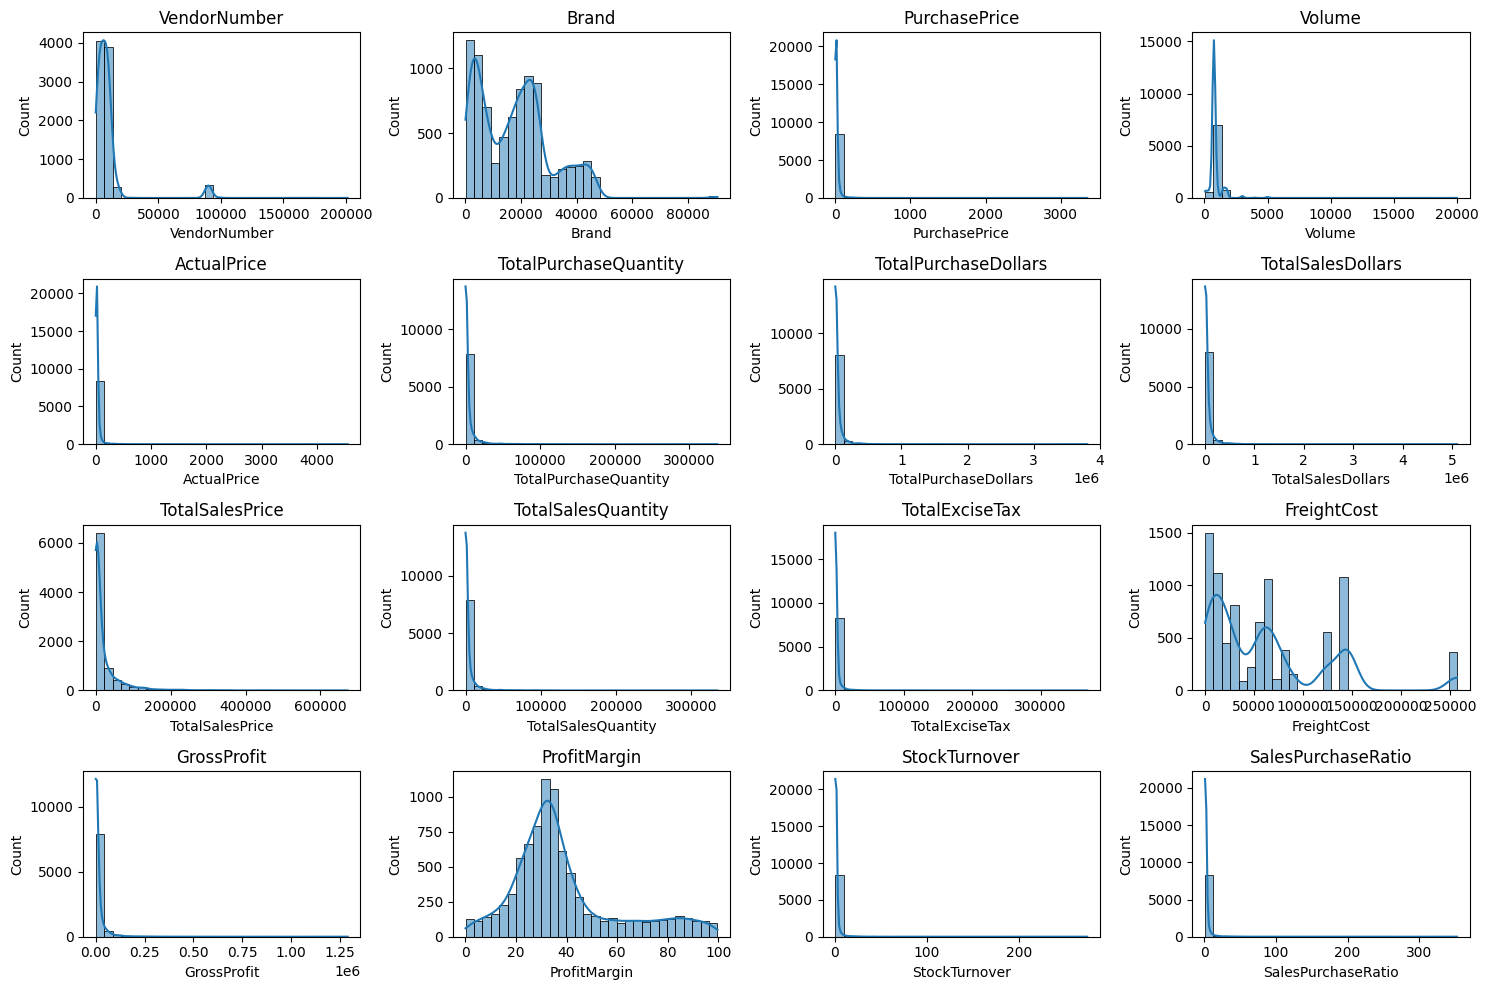

In [83]:
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

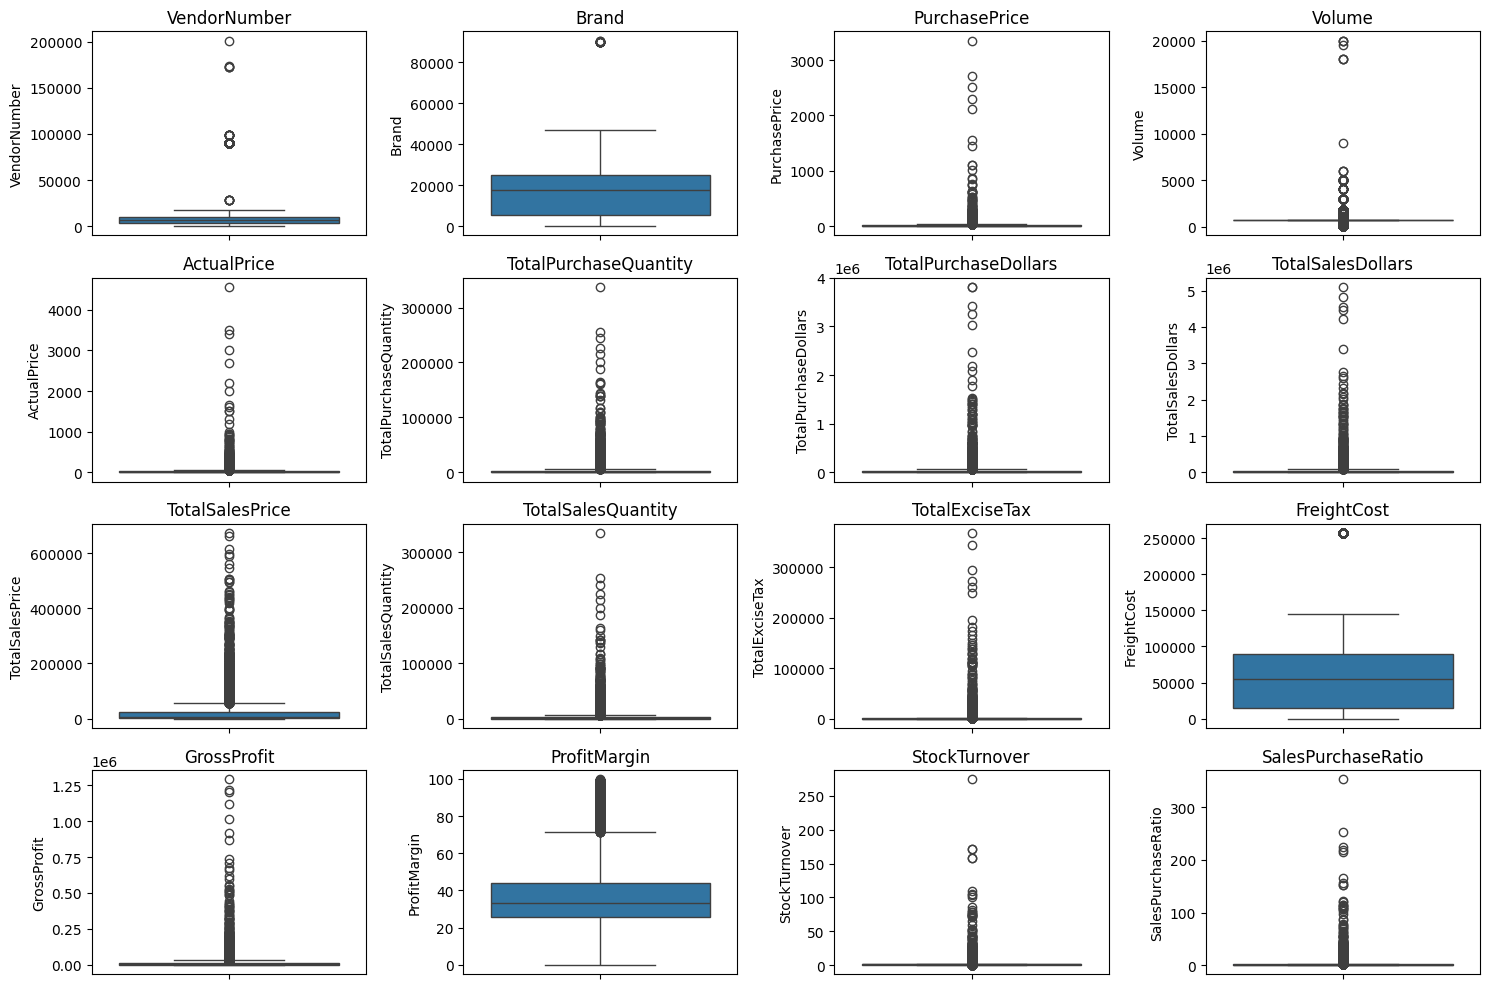

In [84]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

### Negative & Zero Values:
- **Gross Profit**: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.  
- **Profit Margin**: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.  
- **Total Sales Quantity & Sales Dollars**: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.  

### Outliers Indicated by High Standard Deviations:
- **Purchase & Actual Prices**: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.  
- **Freight Cost**: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.  
- **Stock Turnover**: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.  


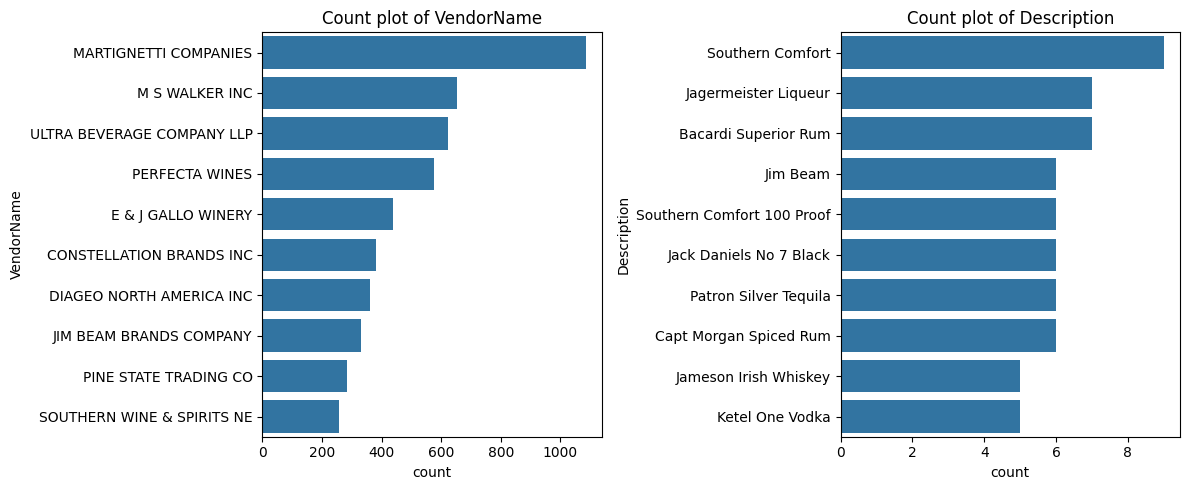

In [85]:
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

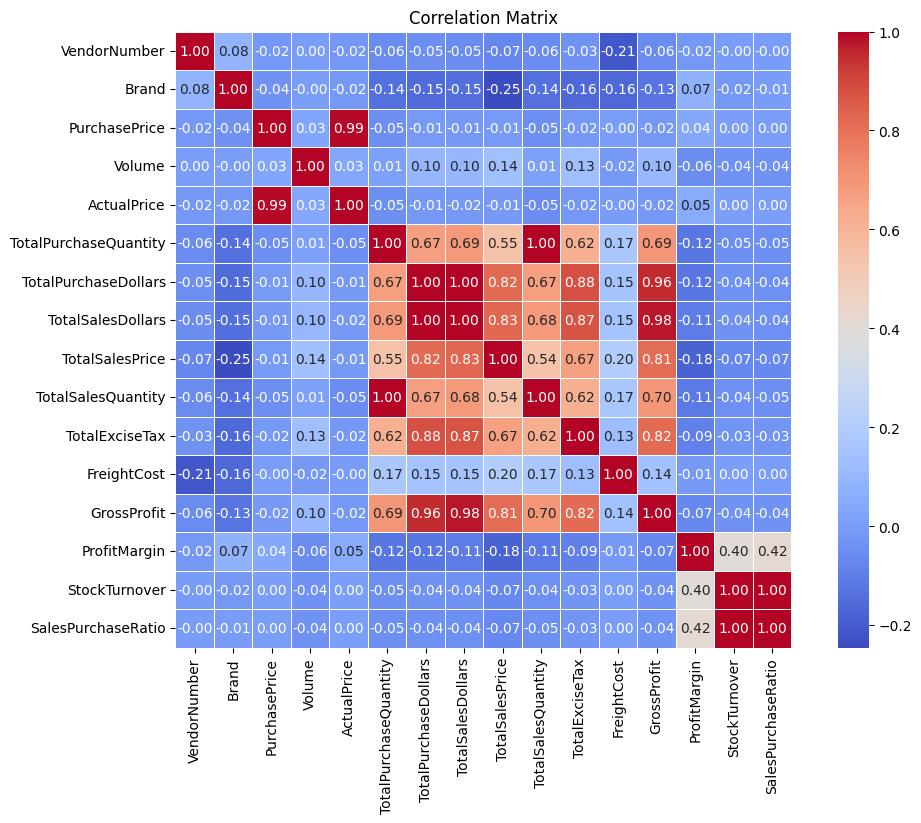

In [86]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()

## Correlation Insights

- **PurchasePrice** has weak correlations with **TotalSalesDollars (-0.012)** and **GrossProfit (-0.016)**, suggesting that price variations do not significantly impact sales revenue or profit.  
- Strong correlation between **total purchase quantity** and **total sales quantity (0.999)**, confirming efficient inventory turnover.  
- Negative correlation between **profit margin** and **total sales price (-0.179)** suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.  
- **StockTurnover** has weak negative correlations with both **GrossProfit (-0.038)** and **ProfitMargin (-0.055)**, indicating that faster turnover does not necessarily result in higher profitability.  


In [87]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'}).reset_index()

In [88]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [89]:
low_sales_threshold

np.float64(560.299)

In [90]:
high_margin_threshold

np.float64(64.97017552750113)

In [91]:
target_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
                                  (brand_performance['ProfitMargin'] >= high_margin_threshold)]
print("Brands with low sales and high profit margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales and high profit margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [92]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

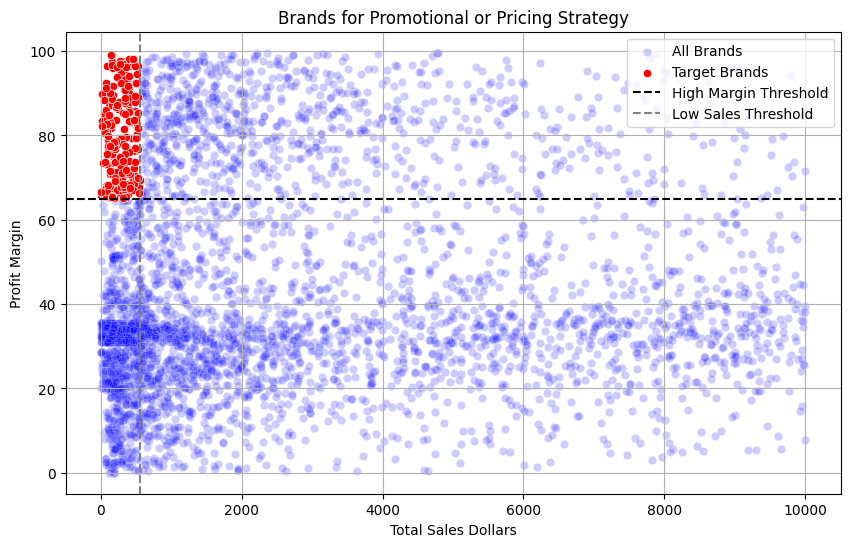

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, color='black', linestyle='--', label='High Margin Threshold')
plt.axvline(low_sales_threshold, color='gray', linestyle='--', label='Low Sales Threshold')

plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin')
plt.title('Brands for Promotional or Pricing Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
def format_dollars(value):
    if value >= 1e6:
        return f'{value/1e6:.2f}M'
    elif value >= 1e3:
        return f'{value/1e3:.2f}K'
    else:
        return str(value)
    

In [95]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [96]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

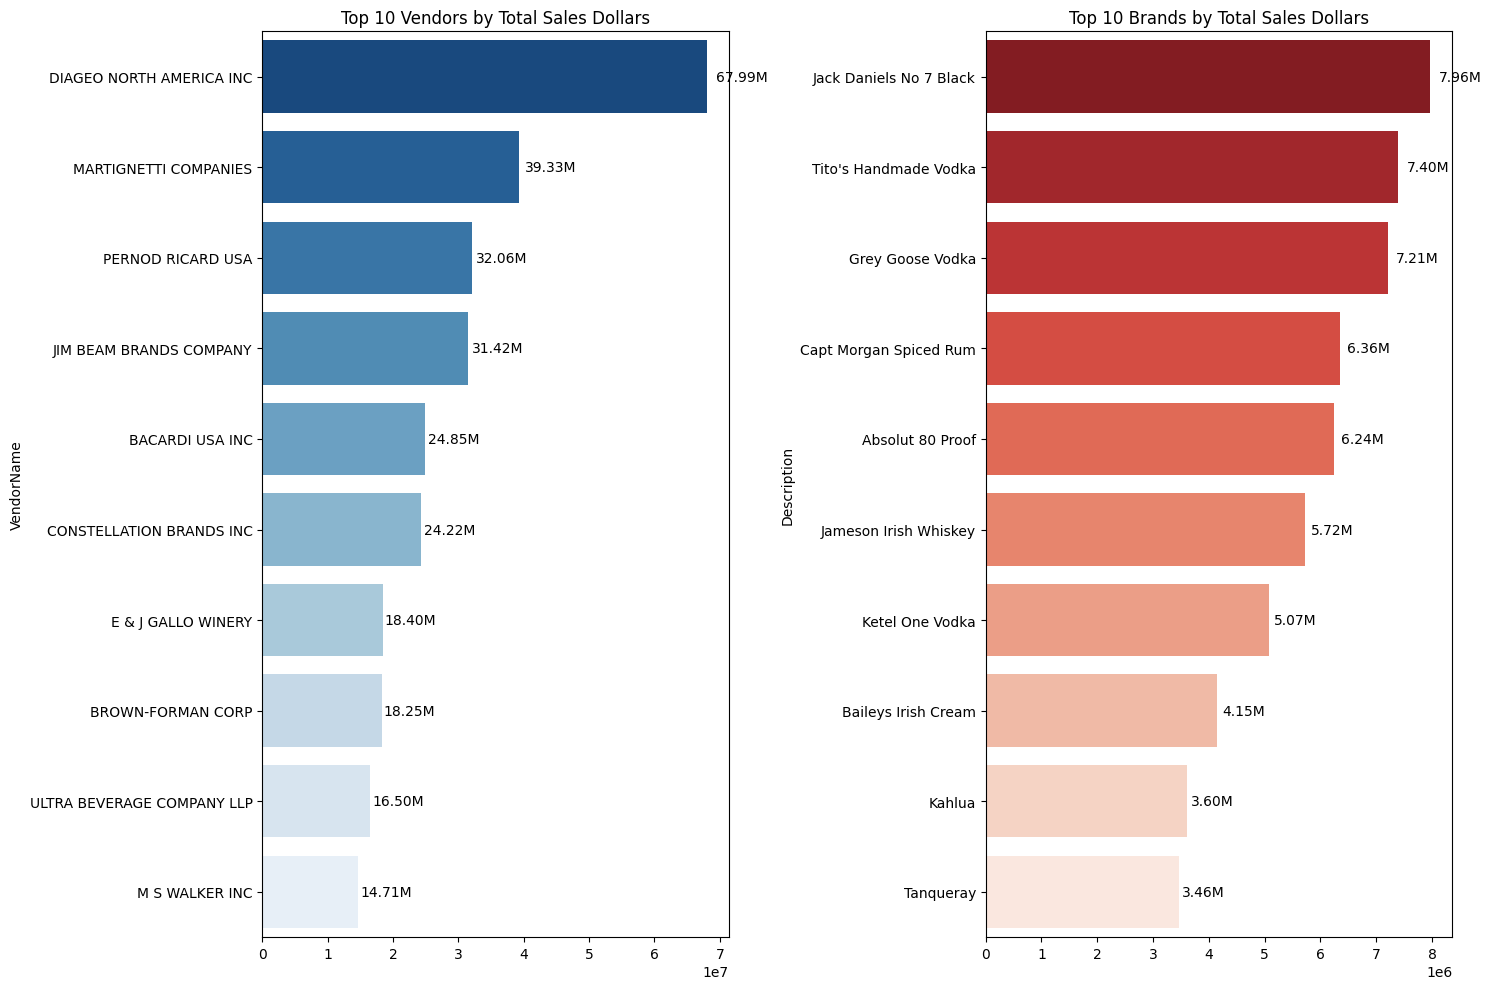

In [97]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette='Blues_r')
plt.title('Top 10 Vendors by Total Sales Dollars')

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             va='center', fontsize=10, color='black')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette='Reds_r')
plt.title('Top 10 Brands by Total Sales Dollars')

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [98]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [99]:
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()) * 100

In [100]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False), 2)

In [101]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [102]:
top_vendors['CummulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CummulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


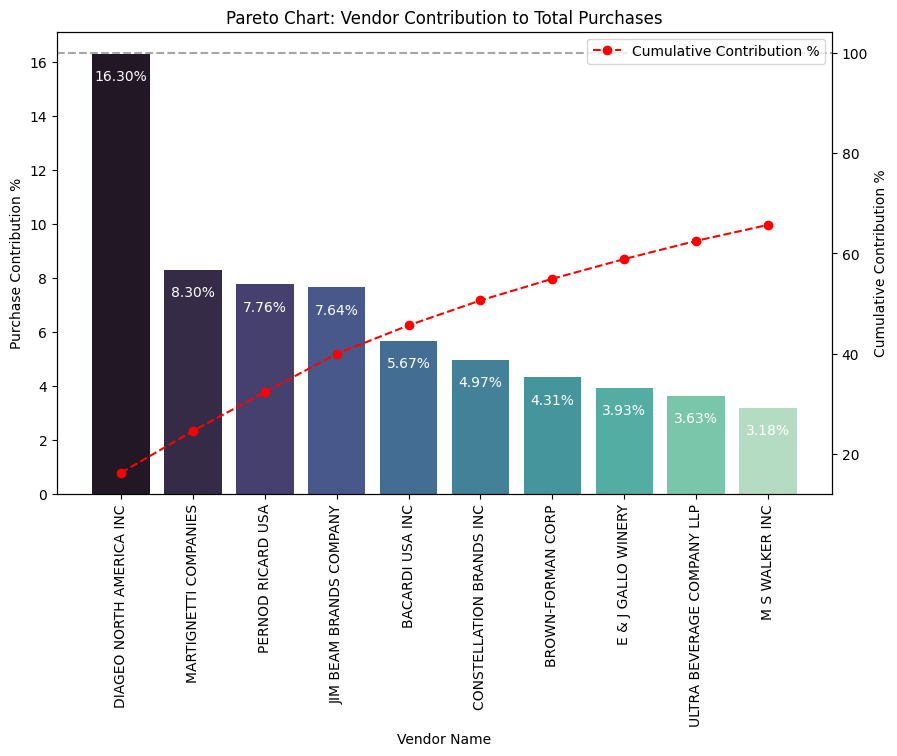

In [103]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], ax=ax1, palette='mako')

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f'{value:.2f}%', ha='center', fontsize=10, color='white')
    
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CummulativeContribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %')
ax2.set_ylabel('Cumulative Contribution %')
ax1.set_xlabel('Vendor Name')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y = 100, color = 'gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


In [104]:
print(f"Total Purchase Contribution by Top 10 Vendors: {top_vendors['PurchaseContribution%'].sum():.2f}%")

Total Purchase Contribution by Top 10 Vendors: 65.69%


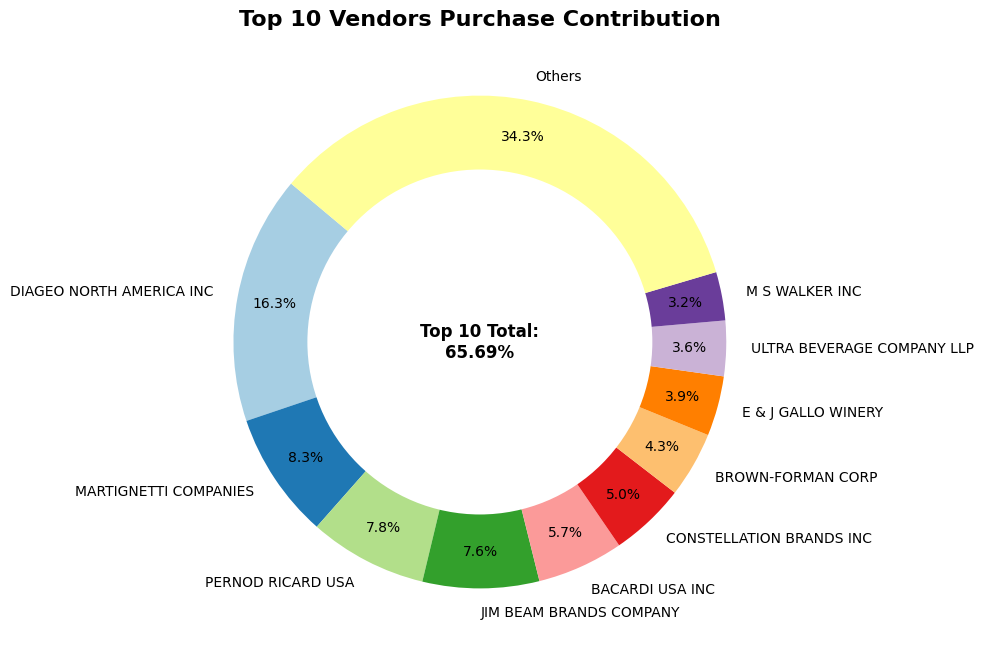

In [105]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

vendors.append('Others')
purchase_contribution.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.text(0, 0, f'Top 10 Total:\n{total_contribution:.2f}%', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')

plt.title('Top 10 Vendors Purchase Contribution', fontsize=16, fontweight='bold')
plt.show()

In [106]:
df['UnitPrice'] = round(df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity'], 2)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio,UnitPrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [107]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [108]:
df.groupby('OrderSize')[['UnitPrice']].mean()

,UnitPrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


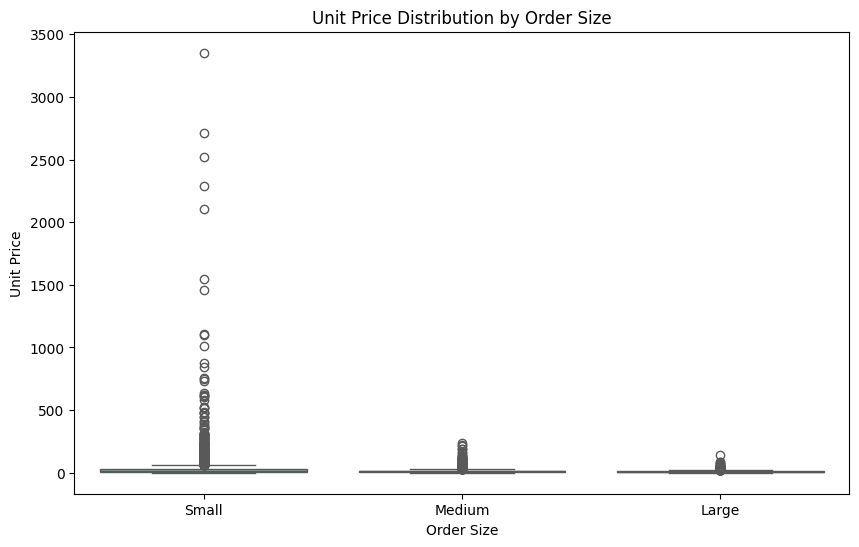

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OrderSize', y='UnitPrice', palette='Set2')
plt.title('Unit Price Distribution by Order Size')
plt.xlabel('Order Size')
plt.ylabel('Unit Price')
plt.show()

## Bulk Order Insights

- Vendors buying in bulk (**Large Order Size**) get the lowest unit price (**$10.78 per unit**), meaning higher margins if they can manage inventory efficiently.  
- The price difference between **Small and Large orders** is substantial (**~72% reduction in unit cost**).  
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.  


In [118]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [120]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total unsold capital: $', format_dollars(df['UnsoldInventoryValue'].sum()))

Total unsold capital: $ 2.71M


In [121]:
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [123]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [124]:
top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [125]:
top_vendors.head(10)

0    25.297693
1    21.062810
2    24.675786
3    27.139908
4    28.412764
5    27.106980
6    21.493098
7    19.432812
8    27.902068
9    27.181081
Name: ProfitMargin, dtype: float64

In [126]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean, mean - margin_of_error, mean + margin_of_error

Top Vendors - Mean: 31.18, CI: (30.74, 31.61)
Low Vendors - Mean: 41.57, CI: (40.50, 42.64)


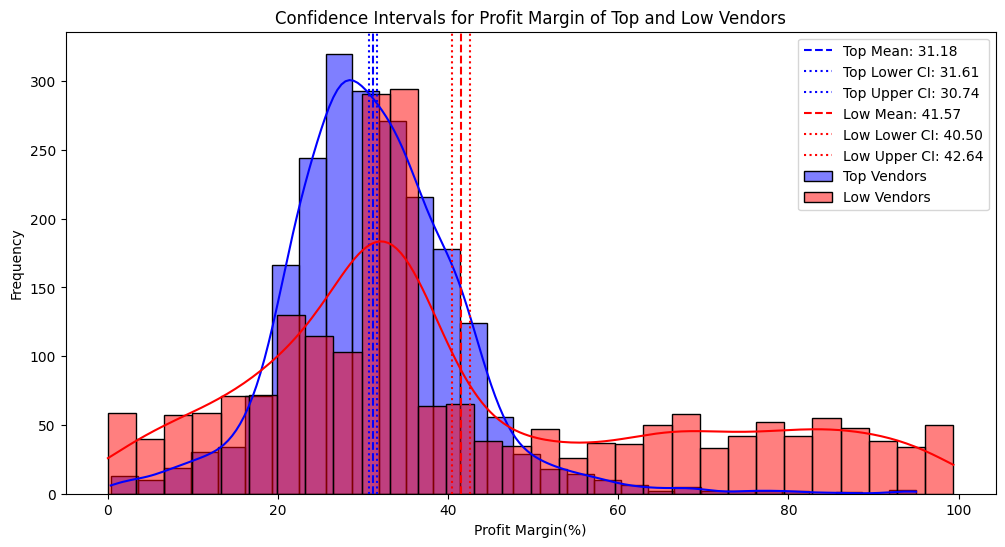

In [128]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors - Mean: {top_mean:.2f}, CI: ({top_lower:.2f}, {top_upper:.2f})")
print(f"Low Vendors - Mean: {low_mean:.2f}, CI: ({low_lower:.2f}, {low_upper:.2f})")

plt.figure(figsize=(12, 6))

sns.histplot(top_vendors, color='blue', label='Top Vendors', kde=True, bins=30, alpha=0.5)
plt.axvline(top_mean, color='blue', linestyle='--', label=f'Top Mean: {top_mean:.2f}')
plt.axvline(top_lower, color='blue', linestyle=':', label=f'Top Lower CI: {top_upper:.2f}')
plt.axvline(top_upper, color='blue', linestyle=':', label=f'Top Upper CI: {top_lower:.2f}')

sns.histplot(low_vendors, color='red', label='Low Vendors', kde=True, bins=30, alpha=0.5)
plt.axvline(low_mean, color='red', linestyle='--', label=f'Low Mean: {low_mean:.2f}')
plt.axvline(low_lower, color='red', linestyle=':', label=f'Low Lower CI: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle=':', label=f'Low Upper CI: {low_upper:.2f}')

plt.title('Confidence Intervals for Profit Margin of Top and Low Vendors')
plt.xlabel('Profit Margin(%)')
plt.ylabel('Frequency')
plt.legend()
# plt.grid(True)
plt.show()

- The confidence interval for **low-performing vendors (40.48% to 42.62%)** is significantly higher than that of **top-performing vendors (30.74% to 31.61%)**.  
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.  
- **For High-Performing Vendors**: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.  
- **For Low-Performing Vendors**: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.  

## Hypothesis Testing: Profit Margin Comparison

**Research Question:**  
Is there a significant difference in profit margins between top-performing and low-performing vendors?

**Hypothesis:**  
- **H₀ (Null Hypothesis):** There is no significant difference in the mean profit margins of top-performing and low-performing vendors.  
- **H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are significantly different.  


In [130]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: The difference in profit margins between top and low vendors is statistically significant.")
else:
    print("Failed to reject H₀: The difference in profit margins between top and low vendors is not statistically significant.")

T-statistic: -17.67, P-value: 0.0000
Reject H₀: The difference in profit margins between top and low vendors is statistically significant.
